#### cv2.cvtColor() method

In [1]:
import cv2

In [2]:
image = cv2.imread('cvdata/im3.jpg')

BGR = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
HSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
 
cv2.imshow('original', image)
cv2.waitKey(0)
cv2.imshow('BGR_Convert', BGR)
cv2.waitKey(0)
cv2.imshow('HSV_Convert', HSV)
cv2.waitKey(0)

cv2.destroyAllWindows()

##### Filter Color

In [3]:
#Attach External camera if this system doesn't have any.

import cv2
import numpy as np
 
cap = cv2.VideoCapture(0)
    
while(1):
    _, frame = cap.read()
    # It converts the BGR color space of image to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
     
    # Threshold of skin color in HSV space
    lower_skin = np.array([0,10,60])
    upper_skin = np.array([20,150,255]) 
 
    # preparing the mask to overlay
    mask = cv2.inRange(hsv, lower_skin, upper_skin)
     
    # The black region in the mask has the value of 0,
    # so when multiplied with original image removes all non-blue regions
    result = cv2.bitwise_and(frame, frame, mask = mask)
 
    cv2.imshow('frame', frame)
    cv2.waitKey(0)
    cv2.imshow('mask', mask)
    cv2.waitKey(0)
    cv2.imshow('result', result) 
    cv2.waitKey(0)
    break

cv2.destroyAllWindows()
cap.release()

##### Denoising of colored images

In [4]:
image = cv2.imread('cvdata/denoise.png')

denoise_img = cv2.fastNlMeansDenoisingColored(image,10,10,7,21)
cv2.imshow('original', image)
cv2.imshow('denoise_image', denoise_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Visualizing a Image

##### Visualizing image in different color spaces

In [5]:
image = cv2.imread('cvdata/im3.jpg')

#RGB

RGB = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
HLS = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
HSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
YCrCb = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
YUV = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
BGR_LAB = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)


images = [RGB, HLS, HSV, YCrCb, YUV, BGR_LAB]


for i in range(6):
    cv2.imshow('{}'.format(str(images[i])), images[i])
    cv2.waitKey(0)
    
cv2.destroyAllWindows()


##### Edge Map of a image

In [6]:
image = cv2.imread('cvdata/im1.jpg')

laplacian = cv2.Laplacian(image, cv2.CV_64F)
sobel = cv2.Sobel(image, -1,1,0)

cv2.imshow('Laplacian_edge', laplacian)
cv2.waitKey(0)
cv2.imshow('Sobel_edge', sobel)
cv2.waitKey(0)

cv2.destroyAllWindows()

##### images with colormaps

###### Image must be in PNG format

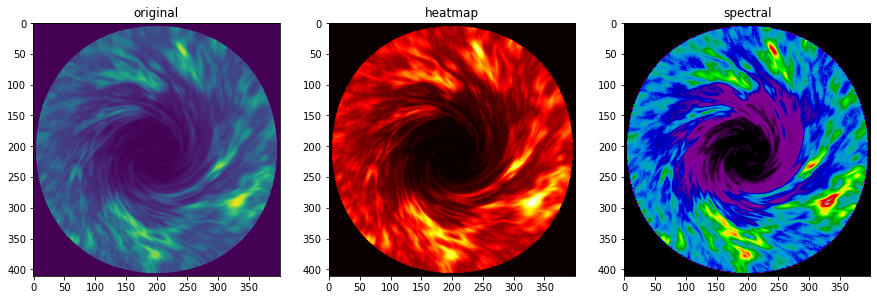

In [7]:
import matplotlib.pyplot as plt


#Heatmap

image = cv2.imread('cvdata/bh.png',0)

cmap = [None,'hot', 'nipy_spectral']

plt.figure(figsize=(15,15))

titles = ['original', 'heatmap' , 'spectral']
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(image, cmap = cmap[i])
    plt.title(titles[i])
plt.show()

### Finding and Drawing the Contours

###### FindContours Parameters

###### DrawContours Parameters

In [8]:
img = cv2.imread('cvdata/contour.jpg',cv2.IMREAD_COLOR)
imgGray = cv2.imread('cvdata/contour.jpg',0)

#Finding the contours
ret , thres = cv2.threshold(imgGray, 110,255, cv2.THRESH_BINARY)

cont, hie = cv2.findContours(thres,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

#Drawing the contours
img2 = cv2.drawContours(img, cont, -1, [241,249,49],3 )

cv2.imshow('contours on image', img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

#printing the total contours found

print('Total Contours are : ', len(cont))
key = int(input('Wich contour Coordinates you would like to see (any one) : '))
if key <=4:
    print("The array is as shown below : ", cont[key-1])
else:
    print("Invalid Key entered")

Total Contours are :  4
Wich contour Coordinates you would like to see (any one) : 3
The array is as shown below :  [[[377  58]]

 [[376  59]]

 [[375  59]]

 [[374  59]]

 [[373  59]]

 [[372  59]]

 [[371  59]]

 [[370  59]]

 [[369  59]]

 [[368  59]]

 [[367  59]]

 [[366  59]]

 [[365  59]]

 [[364  59]]

 [[363  59]]

 [[362  59]]

 [[361  59]]

 [[360  59]]

 [[359  59]]

 [[358  59]]

 [[357  59]]

 [[356  59]]

 [[355  59]]

 [[354  59]]

 [[353  59]]

 [[352  60]]

 [[351  60]]

 [[350  60]]

 [[349  60]]

 [[348  60]]

 [[347  60]]

 [[346  60]]

 [[345  60]]

 [[344  60]]

 [[343  60]]

 [[342  60]]

 [[341  60]]

 [[340  60]]

 [[339  60]]

 [[338  60]]

 [[337  60]]

 [[336  60]]

 [[335  60]]

 [[334  60]]

 [[333  60]]

 [[332  60]]

 [[331  61]]

 [[330  61]]

 [[329  61]]

 [[328  61]]

 [[327  61]]

 [[326  61]]

 [[325  61]]

 [[324  61]]

 [[323  61]]

 [[322  61]]

 [[321  61]]

 [[320  61]]

 [[319  61]]

 [[318  61]]

 [[317  61]]

 [[316  61]]

 [[315  61]]

 [

#### Bilateral Filtering

In [9]:

img = cv2.imread('cvdata/im1.jpg')
  
# Apply bilateral filter with d = 15, 
# sigmaColor = sigmaSpace = 75.
bilateral = cv2.bilateralFilter(img, 15, 200, 200)
  
# Save the output.
cv2.imshow('original', img)
cv2.waitKey(0)
cv2.imshow('im1_bilateral', bilateral)
cv2.waitKey(0)
cv2.destroyAllWindows()

#### Image Inpainting (Very Useful)

In [17]:
img = cv2.imread('cvdata/inpaint.png')
mask = cv2.imread('cvdata/mask_inpt.png',0)

inpainted_img = cv2.inpaint(img,mask,3, cv2.INPAINT_NS)

cv2.imshow('Distorted_Img', img)
cv2.imshow('mask', mask)
cv2.imshow('Inpainted_TELEA', inpainted_img)
cv2.waitKey(0)
cv2.destroyAllWindows()